# Homework Set 6

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 7, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE

Run the following cell to import the necessary packages.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate


# Exercise 1



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

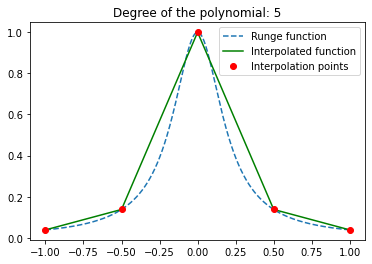

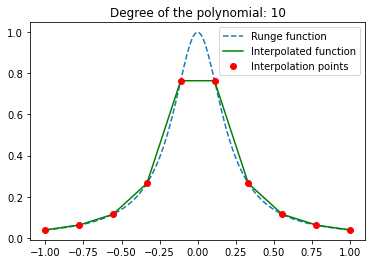

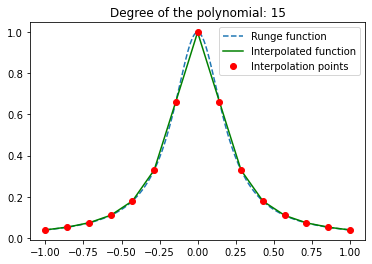

In [2]:
def f_Runge(t):
    ''' Returns the f(t) value of the Runge function.
    '''
    return (1/(1 + 25 * t**2))

def interpolation_points(interval, degree):
    ''' Returns a list of n=degree linearly spaced interpolation points in the [min_x, max_x] interval.
    '''
    points = np.linspace(interval[0], interval[1], degree)
    return points

def poly_linear(interval, degree_list):
    ''' Interpolation of the Runge function with a k-degree polynomial in a given range.
    
    Plots the interpolated function against the real function for every given degree.
    Interpolation points are spaced evenly.
    '''
    x_range = np.linspace(interval[0], interval[1], 1000)
    y_runge = f_Runge(x_range)

    for degree in degree_list:
        # Calculation and interpolation
        x_points = interpolation_points(interval, degree)
        runge_points = f_Runge(x_points)
        y_interpolated = np.interp(x_range, x_points, runge_points)
        
        # Plotting
        plt.title('Degree of the polynomial: ' +str(degree))
        plt.plot(x_range, y_runge, '--', label='Runge function')
        plt.plot(x_range, y_interpolated, c='g', label='Interpolated function')
        plt.plot(x_points, runge_points, 'ro', label='Interpolation points')
        plt.legend()
        plt.show()
    
poly_linear([-1, 1], [5, 10, 15])


# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

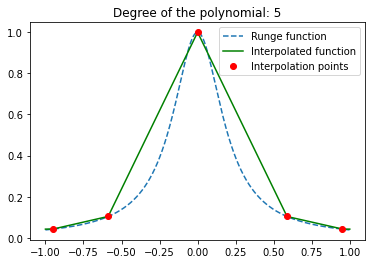

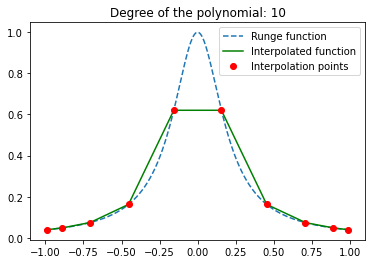

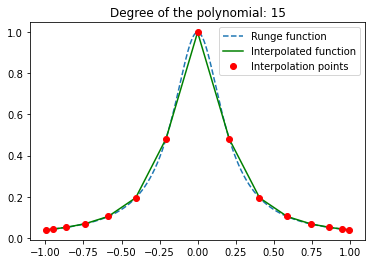

In [3]:
def interpolation_Chebyshev(degree):
    ''' Returns a list of n=degree Chebyshev points on the default interval [-1, 1]. 
    
    Because Chebyshev points are projections of evenly spaced points on the unit circle,
    which works counter clockwise, the points are in descending order by default.
    Numpy's interpolation function needs them in ascending order, so the array is flipped.
    '''
    points = np.array([np.cos(((2*t - 1)*np.pi)/(2*degree)) for t in range(1, degree+1)])
    return np.flip(points)

def poly_Chebyshev(interval, degree_list):
    ''' Interpolation of the Runge function with a k-degree polynomial in a given range.
    
    Plots the interpolated function against the real function for every given degree.
    Interpolation points are spaced evenly.
    '''
    x_range = np.linspace(interval[0], interval[1], 1000)
    y_runge = f_Runge(x_range)

    for degree in degree_list:
        # Calculation and interpolation
        x_points = interpolation_Chebyshev(degree)
        runge_points = f_Runge(x_points)
        y_interpolated = np.interp(x_range, x_points, runge_points)
        
        # Plotting
        plt.title('Degree of the polynomial: ' +str(degree))
        plt.plot(x_range, y_runge, '--', label='Runge function')
        plt.plot(x_range, y_interpolated, c='g', label='Interpolated function')
        plt.plot(x_points, runge_points, 'ro', label='Interpolation points')
        plt.legend()
        plt.show()

poly_Chebyshev([-1,1], [5, 10, 15])
# def poly_Chebyshev(func, interval, k, show_dots=True):
    
#     xFunc = np.linspace(interval[0], interval[1], 1000)
#     yFunc = func(xFunc, k=5) #adjust for runge
#     plt.plot(xFunc, yFunc, '-', color='black')
    
#     colors = ['b', 'r', 'y']
    
#     for times in range(len(k)):   
#         xp = np.linspace(interval[0], interval[1], k[times])
        
#         fp = func(xp, k[times])

#         xvals = np.linspace(interval[0], interval[1], k[times]*10)
#         yinterp = np.interp(xvals, xp, fp)
        
#         if show_dots is True:
#             plt.plot(xp, fp, 'o', color=colors[times])
#         plt.plot(xvals, yinterp, '-', color=colors[times])
#     plt.show()

# polyC(Chebyshev, [-1,1], [5,10,15], show_dots=True)

# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.

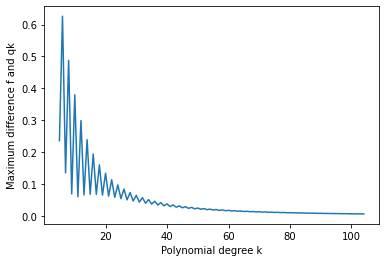

In [8]:
def find_max_difference(x_base, runge_base, degree):
    ''' Returns the maximum absolute difference between the Runge function and
    a interpolation of the function for a given degree.
    '''
    x_points = interpolation_Chebyshev(degree)
    runge_points = f_Runge(x_points)
    y_interpolated = np.interp(x_base, x_points, runge_points)
    difference = np.abs(runge_base - y_interpolated)
    return np.max(difference)

def difference_simulation(degrees):
    ''' Calculates and plots the differences for a range of polynomial degrees. '''
    differences = np.zeros(len(k_range))
    x_base = np.linspace(-1, 1, 1000)
    y_base = f_Runge(x_base)
    for i in range(len(degrees)):
        differences[i] = find_max_difference(x_base, y_base, degrees[i])
        
    plt.xlabel('Polynomial degree k')
    plt.ylabel('Maximum difference f and qk')
    plt.plot(k_range, differences)
    plt.show()

k_range = np.arange(5, 105, 1)
difference_simulation(k_range)
  

# Exercise 2
The *gamma function* is defined by
$$ \Gamma(x) = \int_0^\infty t^{x-1} e^{-t} \, dt , \qquad x>0.
$$
In this exercise you will study the numerical evaluation of this integral. You are asked to first truncate the integral at $t = L$ (to have a finite integration interval, see book section 8.4.2) and then use a composite Simpson's method to evaluate the resulting integral. We denote $f(t) = t^{x-1} e^{-t}$. For definiteness we will take $x=5$. 

Note that for integers $\Gamma(n) = (n-1)!$ and that $\Gamma(x)$ is implemented in the Python math library, so that the true value of the integral is available for comparison purposes.

The truncation error is the error incurred by truncating the interval of integration to a finite interval.

(We will not explore other methods such as adaptive integration and Gauss-Laguerre quadrature.)


# (a)
There are two types of errors in the approximation the of the above given improper integral: The truncation error and the error in the numerical integration over the finite interval. When only a limited number $n$ of function evaluations is available the parameter $L$ needs to be carefully chosen. Both very large and very small values of $L$ will lead to large overall errors. Which of the two types of errors is large when $L$ is large, which one when $L$ is small? Why?




With only a limited amount of function evaluations available, the step size of the regions between the interval limits becomes relatively large. Setting the parameter L, which can be seen as the upper limit of the truncated interval, too low, will lead to large truncation errors as a smaller region of the function will be taken into consideration and its inner-values will be overweighted by the Simpson's method.

Setting the parameter value of L too high will lead to large numerical integration errors as the increased size of the step size will lead to a worse estimation of the function.

# (b)
Write python code to compute the integral of $f$ over a given interval using the composite Simpson's rule using $n$ function evaluations. Test your code by integrating $f$ over $[0,32]$ using 33 function evaluations.

In [78]:
def f_gamma(t, x=5):
    ''' Evaluation of the given function f at point t.
    
    For definiteness x is set at 5, but can be altered.
    '''
    return t**(x-1)*math.e**(-t)

def simpson_mask(n):
    ''' Creates a mask of size n for Simpson's method calculation. 
    
    Has the shape [1, (repetition of [4, 2]), 4, 1]
    '''
    mask = [2, 4]*int(n/2)
    mask[0] = 1
    mask.append(1)
    return np.array(mask)

def simpson_integrate(function, a, b, n):
    ''' Calculates the integral of a function by way of Simpson's method. 
    
    n = the amount of function evaluations. Should be an odd number for 
    a even number of evaluation intervals.
    '''
    x_i = np.zeros(n)
    mask = simpson_mask(n-1)
    
    delta_x = (b-a)/(n-1) # Step size
    for i in range(n):
        t = (delta_x * i) + a
        x_i[i] = function(t)
    
    prod_sum = np.dot(x_i, mask)
    integrant = delta_x/3 * prod_sum
    return integrant
    
print('Approximated value of integral: ', simpson_integrate(f_gamma, 0, 7, 3))
print('Numpy integration: ', integrate.quad(f_gamma, 0, 10)[0])
print('Real value: ', math.gamma(5))

Approximated value of integral:  23.701309331633595
Numpy integration:  23.29793548615294
Real value:  24.0


# (c)
Now vary $L$, keeping $n$ constant. You may choose $L = 2^K$ with $K$ an integer. Make a loglog plot of the overall error as a function of $L$. For what $L$ is the overall error minimal? What is the total error in this case? Use $n=65$ function evaluations. 


In [ ]:
# your program here